## adaBoost

In [85]:
from numpy import *
import numpy

In [86]:
def loadSimData():
    datMat=matrix([[1.,2.1],
                  [2.,1.1],
                  [1.3,1.],
                  [1.,1.],
                  [2.,1.]])
    classLabels=[1.0,1.0,-1.0,-1.0,1.0]
    return datMat, classLabels

In [87]:
datMat, classLabels= loadSimData()

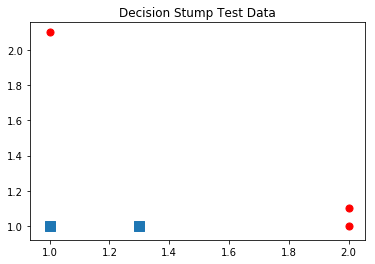

In [88]:
import matplotlib.pyplot as plt
xcord0=[]
xcord1=[]
ycord0=[]
ycord1=[]

for i in range(len(classLabels)):#라벨이 1.0이랑 -1.이니까 두개로 나눠줘야함
    if classLabels[i]==1.0:
        xcord1.append(datMat[i,0]),ycord1.append(datMat[i,1])
    else:
        xcord0.append(datMat[i,0]),ycord0.append(datMat[i,1])

fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(xcord0,ycord0, marker='s',s=90)
ax.scatter(xcord1,ycord1, marker='o', s=50, c='red')
plt.title("Decision Stump Test Data")
plt.show()

In [89]:
def stumpClassify(dataMatrix,dimen,threshVal,threshIneq):#just classify the data
    retArray=ones((shape(dataMatrix)[0],1))
    if threshIneq=='lt':
        retArray[dataMatrix[:,dimen]<= threshVal] =-1.0
    else :
        retArray[dataMatrix[:,dimen]> threshVal] =-1.0
    return retArray

In [100]:
def buildStump(dataArr,classLabels,D):
    dataMatrix=mat(dataArr)
    labelMat=mat(classLabels).T
    m,n=shape(dataMatrix)
    numSteps=10.0
    bestStump={}
    bestClasEst=mat(zeros((m,1)))
    minError=inf
    for i in range(n):
        rangeMin=dataMatrix[:,i].min()
        rangeMax=dataMatrix[:,i].max()
        stepSize=(rangeMax-rangeMin)/numSteps
        for j in range(-1,int(numSteps)+1):
            for inequal in ['lt','gt']:
                threshVal=(rangeMin+float(j)*stepSize)
                
                predictedVals=stumpClassify(dataMatrix,i,threshVal,inequal)
                errArr=mat(ones((m,1)))
                errArr[predictedVals==labelMat]=0
                weightedError=D.T*errArr
                print("split:dim {}, thresh {}, thresh inequal: {}, 
                      the weighted error is {}".format(i, threshVal,inequal,weightedError))
                if weightedError < minError :
                    minError = weightedError
                    bestClasEst =predictedVals.copy()
                    bestStump['dim']=i
                    bestStump['thresh']=threshVal
                    bestStump['ineq']=inequal
    return bestStump,minError,bestClasEst

In [101]:
D=mat(ones((5,1))/5) # D를 최소화 시켜줌
buildStump(datMat, classLabels, D)
#array가 예측한 라벨링. 설정한 classLabel와 비교하면 error가 보임.

split:dim 0, thresh 0.9, thresh inequal: lt, the weighted error is [[0.4]]
split:dim 0, thresh 0.9, thresh inequal: gt, the weighted error is [[0.6]]
split:dim 0, thresh 1.0, thresh inequal: lt, the weighted error is [[0.4]]
split:dim 0, thresh 1.0, thresh inequal: gt, the weighted error is [[0.6]]
split:dim 0, thresh 1.1, thresh inequal: lt, the weighted error is [[0.4]]
split:dim 0, thresh 1.1, thresh inequal: gt, the weighted error is [[0.6]]
split:dim 0, thresh 1.2, thresh inequal: lt, the weighted error is [[0.4]]
split:dim 0, thresh 1.2, thresh inequal: gt, the weighted error is [[0.6]]
split:dim 0, thresh 1.3, thresh inequal: lt, the weighted error is [[0.2]]
split:dim 0, thresh 1.3, thresh inequal: gt, the weighted error is [[0.8]]
split:dim 0, thresh 1.4, thresh inequal: lt, the weighted error is [[0.2]]
split:dim 0, thresh 1.4, thresh inequal: gt, the weighted error is [[0.8]]
split:dim 0, thresh 1.5, thresh inequal: lt, the weighted error is [[0.2]]
split:dim 0, thresh 1.5, 

({'dim': 0, 'thresh': 1.3, 'ineq': 'lt'}, matrix([[0.2]]), array([[-1.],
        [ 1.],
        [-1.],
        [-1.],
        [ 1.]]))

In [102]:
def adaBoostTrainDS(dataArr,classLabels,numlt=40):
    weakClassArr=[]
    m=shape(dataArr)[0]
    D=mat(ones((m,1))/m) #init D to all equal
    aggClassEst=mat(zeros((m,1)))
    for i in range(numlt):
        bestStump,error,classEst=buildStump(dataArr,classLabels,D) #build stump
        print("D:{}".format(D.T))
        #clac alpha,throw in max(error, eps) to account for error=0
        alpha=float(0.5*log((1.0-error)/max(error,1e-16)))
        bestStump['alpha']=alpha
        weakClassArr.append(bestStump)
        print("calssEst: {}".format(classEst.T))
        #exponent for D calc, getting messy
        expon=multiply(-1*alpha*mat(classLabels).T,classEst)
        D=multiply(D,exp(expon)) #Calc New D for next iteratino
        D=D/D.sum()
        
        
        aggClassEst +=alpha*classEst
        print("aggClassEst:{}".format(aggClassEst.T))
        aggErrors=multiply(sign(aggClassEst)!=mat(classLabels).T, ones((m,1)))
        errorRate=aggErrors.sum()/m
        print("total error:{}".format(errorRate))
        if errorRate == 0.0: break
    return weakClassArr

In [103]:
adaBoostTrainDS(datMat, classLabels, 9)

split:dim 0, thresh 0.9, thresh inequal: lt, the weighted error is [[0.4]]
split:dim 0, thresh 0.9, thresh inequal: gt, the weighted error is [[0.6]]
split:dim 0, thresh 1.0, thresh inequal: lt, the weighted error is [[0.4]]
split:dim 0, thresh 1.0, thresh inequal: gt, the weighted error is [[0.6]]
split:dim 0, thresh 1.1, thresh inequal: lt, the weighted error is [[0.4]]
split:dim 0, thresh 1.1, thresh inequal: gt, the weighted error is [[0.6]]
split:dim 0, thresh 1.2, thresh inequal: lt, the weighted error is [[0.4]]
split:dim 0, thresh 1.2, thresh inequal: gt, the weighted error is [[0.6]]
split:dim 0, thresh 1.3, thresh inequal: lt, the weighted error is [[0.2]]
split:dim 0, thresh 1.3, thresh inequal: gt, the weighted error is [[0.8]]
split:dim 0, thresh 1.4, thresh inequal: lt, the weighted error is [[0.2]]
split:dim 0, thresh 1.4, thresh inequal: gt, the weighted error is [[0.8]]
split:dim 0, thresh 1.5, thresh inequal: lt, the weighted error is [[0.2]]
split:dim 0, thresh 1.5, 

[{'dim': 0, 'thresh': 1.3, 'ineq': 'lt', 'alpha': 0.6931471805599453},
 {'dim': 1, 'thresh': 1.0, 'ineq': 'lt', 'alpha': 0.9729550745276565},
 {'dim': 0, 'thresh': 0.9, 'ineq': 'lt', 'alpha': 0.8958797346140273}]

In [115]:
def adaClassify(datToClass,classifierArr):
    #do stuff similar to last aggClassEst in adaBoostTrainDS
    dataMatrix=mat(datToClass)
    m=shape(dataMatrix)[0]
    aggClassEst=mat(zeros((m,1)))
    for i in range(len(classifierArr)):
        classEst=stumpClassify(dataMatrix,classifierArr[i]['dim'],classifierArr[i]['thresh'],classifierArr[i]['ineq'])
        aggClassEst +=classifierArr[i]['alpha']*classEst
        print(aggClassEst)
    return sign(aggClassEst)

In [116]:
classifierArr=adaBoostTrainDS(datMat,classLabels,30)

split:dim 0, thresh 0.9, thresh inequal: lt, the weighted error is [[0.4]]
split:dim 0, thresh 0.9, thresh inequal: gt, the weighted error is [[0.6]]
split:dim 0, thresh 1.0, thresh inequal: lt, the weighted error is [[0.4]]
split:dim 0, thresh 1.0, thresh inequal: gt, the weighted error is [[0.6]]
split:dim 0, thresh 1.1, thresh inequal: lt, the weighted error is [[0.4]]
split:dim 0, thresh 1.1, thresh inequal: gt, the weighted error is [[0.6]]
split:dim 0, thresh 1.2, thresh inequal: lt, the weighted error is [[0.4]]
split:dim 0, thresh 1.2, thresh inequal: gt, the weighted error is [[0.6]]
split:dim 0, thresh 1.3, thresh inequal: lt, the weighted error is [[0.2]]
split:dim 0, thresh 1.3, thresh inequal: gt, the weighted error is [[0.8]]
split:dim 0, thresh 1.4, thresh inequal: lt, the weighted error is [[0.2]]
split:dim 0, thresh 1.4, thresh inequal: gt, the weighted error is [[0.8]]
split:dim 0, thresh 1.5, thresh inequal: lt, the weighted error is [[0.2]]
split:dim 0, thresh 1.5, 

In [117]:
adaClassify([0,0],classifierArr)

[[-0.69314718]]
[[-1.66610226]]
[[-2.56198199]]


matrix([[-1.]])

Decision Tree
    1 Bagging
    2 Random Forest
    3 adaBoost 비교하기


In [122]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

In [123]:
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=3)
Xm_train, Xm_test, ym_train, ym_test = train_test_split(
    Xm, ym, stratify=ym, random_state=42)

In [127]:
from sklearn.ensemble import RandomForestClassifier

forest=RandomForestClassifier(n_estimators=5, max_features=1,
                             random_state=2)
forest.fit(Xm_train, ym_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

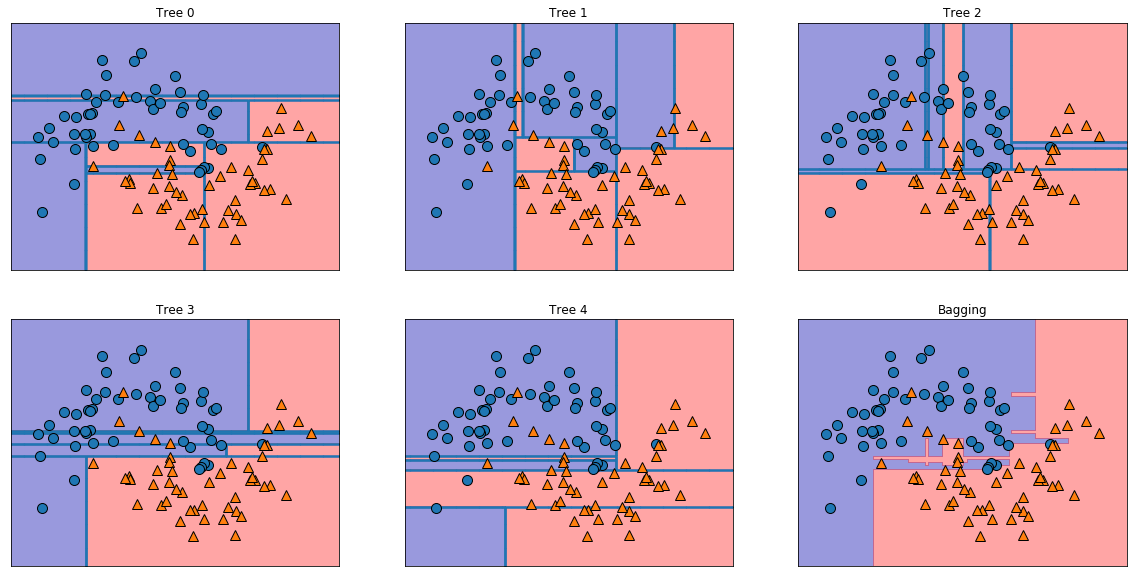

In [151]:
fig, axes=plt.subplots(2,3,figsize=(20,10))
for i, (ax,tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, Xm, fill=True, ax=axes[-1,-1], alpha=0.4)
axes[-1,-1].set_title("Bagging")
mglearn.discrete_scatter(Xm[:,0], Xm[:,1],ym)
plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada=AdaBoostClassifier(n_estimators=5, random_state=42)
ada.fit(Xm_train,ym_train)

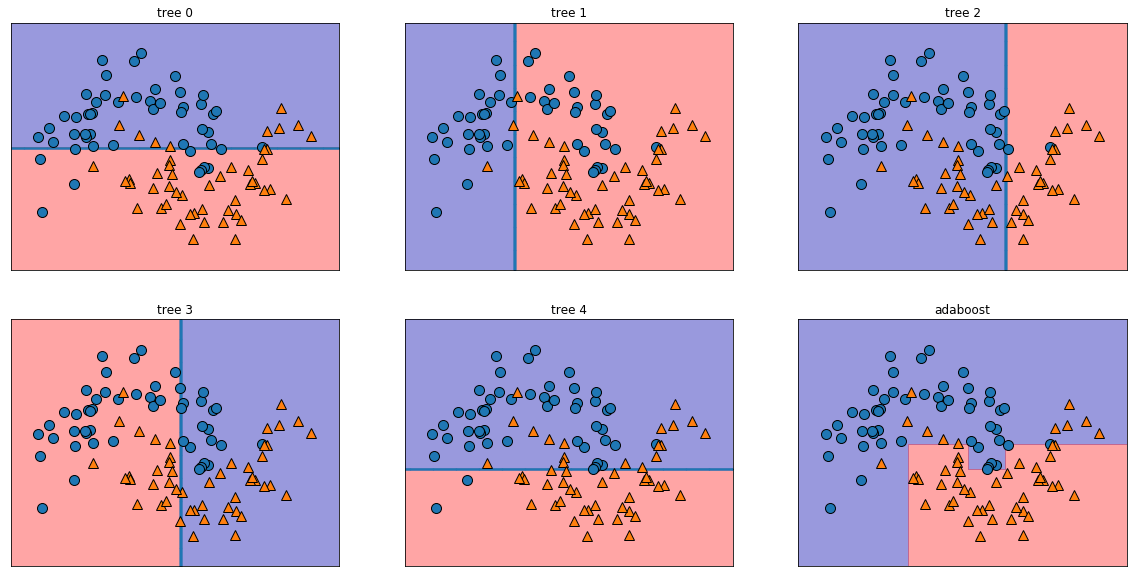

In [169]:
fig, axes= plt.subplots(2,3,figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(),ada.estimators_)):
    ax.set_title("tree {}".format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(ada, Xm, fill=True, ax=axes[-1,-1],alpha=.4)
axes[-1,-1].set_title("adaboost")
mglearn.discrete_scatter(Xm[:,0],Xm[:,1],ym)
plt.show()